# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
import csv
# Number of training examples (training + validation)
n_train = y_train.shape[0] 

# Number of testing examples.
n_test = y_test.shape[0] 

# What's the shape of a traffic sign image?
image_shape = X_train.shape[1:4]

# How many unique classes/labels are there in the dataset.
n_classes = np.bincount(y_train).shape[0]

sign_list = []
with open('signnames.csv', newline='') as csvfile:
    signreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in signreader:
        if (row[1] != "SignName"):
            sign_list.append(row[1]);

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print ("\nTraffic Sign Classes and Occurrences:")
occurrences_each_class = np.bincount(y_train)
for i in range(n_classes):
    print("\t\"{}\" id: {}, training occurrences: {}".format(sign_list[i], i, occurrences_each_class[i]))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

Traffic Sign Classes and Occurrences:
	"Speed limit (20km/h)" id: 0, training occurrences: 210
	"Speed limit (30km/h)" id: 1, training occurrences: 2220
	"Speed limit (50km/h)" id: 2, training occurrences: 2250
	"Speed limit (60km/h)" id: 3, training occurrences: 1410
	"Speed limit (70km/h)" id: 4, training occurrences: 1980
	"Speed limit (80km/h)" id: 5, training occurrences: 1860
	"End of speed limit (80km/h)" id: 6, training occurrences: 420
	"Speed limit (100km/h)" id: 7, training occurrences: 1440
	"Speed limit (120km/h)" id: 8, training occurrences: 1410
	"No passing" id: 9, training occurrences: 1470
	"No passing for vehicles over 3.5 metric tons" id: 10, training occurrences: 2010
	"Right-of-way at the next intersection" id: 11, training occurrences: 1320
	"Priority road" id: 12, training occurrences: 2100
	"Yield" id: 13, training occurrences: 2160
	"St

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

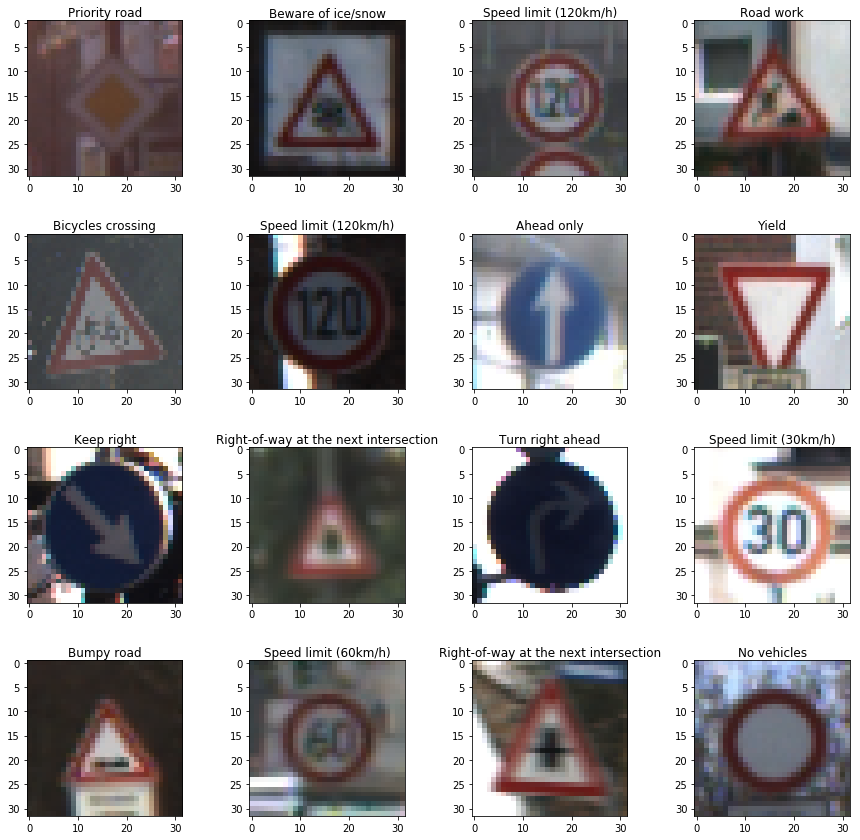

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline

figure = plt.figure(figsize=(12,12))
for i in range(1,17):
    subplot = figure.add_subplot(4,4,i)
    index = randint(0,n_train)
    img = X_train[index]
    plt.title(sign_list[y_train[index]])
    subplot.imshow(img)
plt.tight_layout()
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
from sklearn.utils import shuffle
#Shuffle Data
X_train, y_train = shuffle(X_train, y_train)

#Split Train Set into Train and Validation ~ 80% train - 20% validation
num_validation = 7500;
num_train = n_train - num_validation

X_validation = X_train[0:num_validation,:,:,:]
y_validation = y_train[0:num_validation]

X_train = X_train[num_validation:,:,:,:]
y_train = y_train[num_validation:]

In [5]:

import cv2
from skimage import exposure

def split_hsv(img):
    img_hsv = cv2.cvtColor( img, cv2.COLOR_RGB2HSV)
    img_hs = img_hsv[..., 0:2]
    img_v = img_hsv[..., 2]
    return (img_hs, img_v)

def combine_hsv(hs, v):
    img = np.zeros((hs.shape[0], hs.shape[1], 3), dtype=v.dtype)
    img[..., 0:2] = hs
    img[..., 2] = v
    return img

def original(img):
    return img

def rescale(img):
    img_hs, img_v = split_hsv(img)
    p2, p98 = np.percentile(img_v,(2,98))
    value_rescale = exposure.rescale_intensity(img_v, in_range=(p2,p98))
    result = cv2.cvtColor(combine_hsv(img_hs, value_rescale), cv2.COLOR_HSV2RGB)
    return result

def equalize_histogram(img):
    img_hs, img_v = split_hsv(img)
    value_equalized = cv2.equalizeHist(img_v)
    result = cv2.cvtColor(combine_hsv(img_hs, value_equalized), cv2.COLOR_HSV2RGB)
    return result

def adaptive_histogram(img):
    img_hs, img_v = split_hsv(img)
    clahe = cv2.createCLAHE(tileGridSize=(4,4))
    value_adaptive = clahe.apply(img_v)
    result = cv2.cvtColor(combine_hsv(img_hs, value_adaptive), cv2.COLOR_HSV2RGB)
    return result

## Normalize Images to [-1,1)
def normalize(x):
    x = x.astype(np.float32)
    return (x - 128)/128

def denormalize(x):
    result = np.copy(x)*128 + 128
    return result.astype(np.uint8)

In [6]:
def preprocess_array(array_in, preprocessing):
    array_out = np.zeros(array_in.shape, dtype=np.float32)
    for i in range(array_in.shape[0]):
        img = array_in[i,...]
        processed_img = preprocessing(img)
        array_out[i,...] = normalize(processed_img)
    return array_out

def create_dnn_data(train_x, train_y, validation_x, validation_y, test_x, test_y, preprocessing):    
    data_x_train = preprocess_array(train_x, preprocessing)
    data_x_test = preprocess_array(test_x, preprocessing)
    data_x_validation = preprocess_array(validation_x, preprocessing)
     
    dataset = {'train' : (data_x_train, np.copy(train_y)),
               'test'  : (data_x_test, np.copy(test_y)),
               'validation' : (data_x_validation, np.copy(validation_y))}
    return dataset

def label_to_preprocessing(label):
    label_map = { 'original' : original,
                  'rescale'  : rescale,
                  'equalize' : equalize_histogram,
                  'adaptive' : adaptive_histogram}
    return label_map[label]

def create_test_data(test_x, preprocessing):
    data_x_test = preprocess_array(test_x, preprocessing)
    return data_x_test


In [7]:
labels = ['original', 'rescale', 'equalize', 'adaptive']
multi_dnn = { 'original' : [],
               'rescale' : [],
               'equalize': [],
               'adaptive': []}

num_dnn = 5
for i in range(num_dnn):
    original_dataset = create_dnn_data(X_train, y_train, X_validation, y_validation, X_test, y_test, original)
    rescale_dataset = create_dnn_data(X_train, y_train, X_validation, y_validation, X_test, y_test, rescale)
    equalize_dataset = create_dnn_data(X_train, y_train, X_validation, y_validation, X_test, y_test, equalize_histogram)
    adaptive_dataset = create_dnn_data(X_train, y_train, X_validation, y_validation, X_test, y_test, adaptive_histogram)
    multi_dnn['original'].append(original_dataset)
    multi_dnn['rescale'].append(rescale_dataset)
    multi_dnn['equalize'].append(equalize_dataset)
    multi_dnn['adaptive'].append(adaptive_dataset)

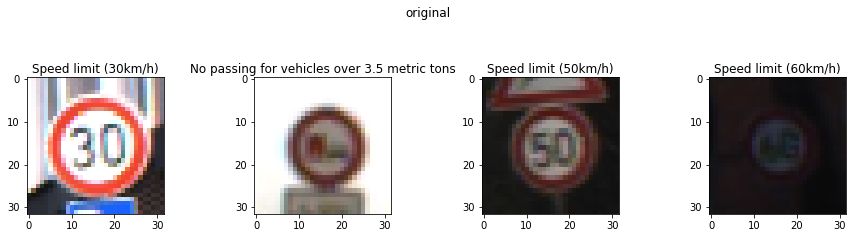

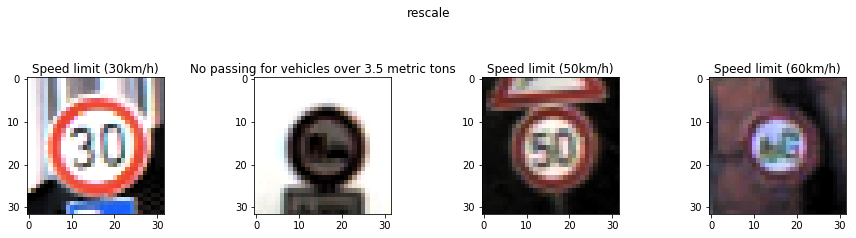

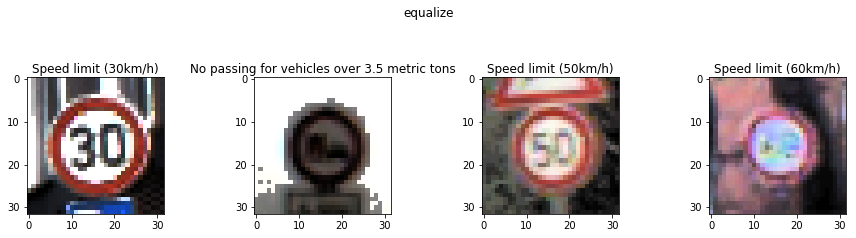

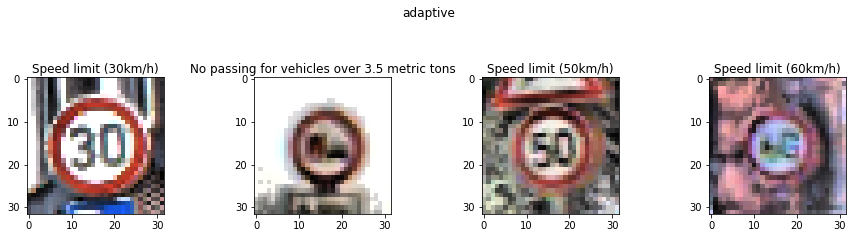

In [8]:
img_index = []
for i in range(5):
    img_index.append(randint(0, num_train))

for label in labels:
    dataset = multi_dnn[label][0]
    train_x, train_y = dataset['train']
    figure = plt.figure(figsize=(12,4))
    figure.suptitle(label)
    for j in range(1,5):
        subplot = figure.add_subplot(1,4,j)
        training_x, training_y = multi_dnn[label][0]['train']
        index = img_index[j-1]
        img = denormalize(training_x[index])
        plt.title(sign_list[training_y[index]])
        subplot.imshow(img)
    plt.tight_layout()
    plt.show()


    

In [9]:
## Translation: +-10% of image size
## Rotation: +- 5 degrees
## Scaling: 0.9 to 1.1
import random
import skimage.transform as skt
def distort_image(img):
    height = img.shape[0]
    width = img.shape[1]
    translate = random.uniform(-0.1, 0.1)
    angle = random.uniform(-5.0, 5.0)
    factor = random.uniform(0.9, 1.1)
    
    tf = skt.SimilarityTransform(rotation=np.deg2rad(angle), scale=factor, 
                                 translation=[width*translate, height*translate] )
    result = skt.warp(img, tf)
    return result

def distort_images(imgs):
    result = np.zeros(imgs.shape, dtype=imgs.dtype)
    for i in range(imgs.shape[0]):
        img = imgs[i,:,:,:] 
        img_distort = distort_image(img)
        result[i,...] = img
    return result

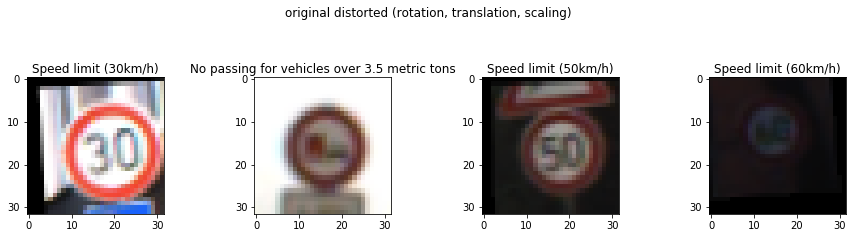

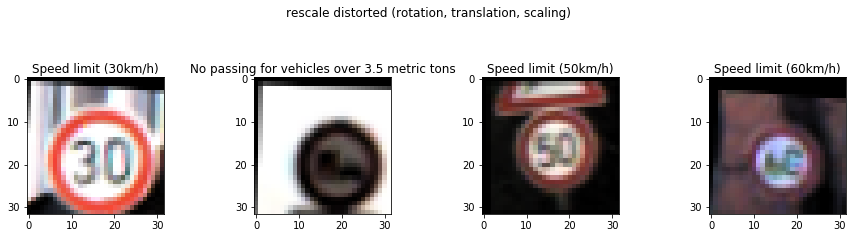

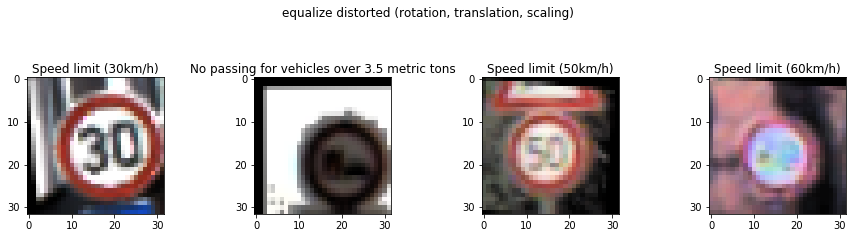

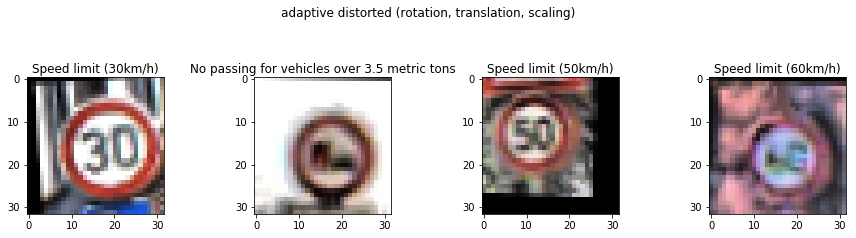

In [10]:
for label in labels:
    dataset = multi_dnn[label][0]
    train_x, train_y = dataset['train']
    figure = plt.figure(figsize=(12,4))
    figure.suptitle(label + " distorted (rotation, translation, scaling)")
    for j in range(1,5):
        subplot = figure.add_subplot(1,4,j)
        training_x, training_y = multi_dnn[label][0]['train']
        index = img_index[j-1]
        img = distort_image(denormalize(training_x[index]))
        plt.title(sign_list[training_y[index]])
        subplot.imshow(img)
    plt.tight_layout()
    plt.show()


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

I applied 3 different equalization algorithms:
* rescale intensity
* histogram equalization
* adaptive histogram equalization

On top of that I created a function *distort_images* that will be used dynamically during training to create transformed images (rotate, scale and translation).

I choose this technique based on the paper that won the German Traffic Sign Contest:
    
    Multi-Column Deep Neural Network for Traffic Sign Classification
    Dan Ciresan, Ueli Meijer, Jonathan Masci and Jurgen Schmidhuber
    Accessed from http://people.idsia.ch/~juergen/nn2012traffic.pdf
    Date of access: 2017/01/12 11:00pm PST


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I have 4 different sets of images: the 3 sets described above (rescale, equalization, adaptive) and the original dataset.

Each of the datasets will be used to train the weights and bias of a different network. The results of each network will then be combined to give the final decision on the label classification. 

As mentioned in the answer to question 1 I am also applying dynamic perturbations to the images (method distort_images). According to Ciresan, the distortions allow to train the DNN with many parameters without overfitting and improving generalization performance.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def traffic_sign_net(x, keep_prob):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x70.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 70), mean = mu, stddev = sigma), 
                          name="conv1_W")
    conv1_b = tf.Variable(tf.zeros(70), name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x70. Output = 14x14x70.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 12x12x100.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 70, 100), mean = mu, stddev = sigma),
                             name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(100), name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 12x12x100. Output = 6x6x100.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 4x4x160.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 100, 160), mean = mu, stddev = sigma),
                          name="conv3_W")
    conv3_b = tf.Variable(tf.zeros(160), name="conv3_b")
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 4x4x160. Output = 2x2x160.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 2x2x160. Output = 640.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 640. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(640, 200), mean = mu, stddev = sigma),
                        name="fc1_W")
    fc1_b = tf.Variable(tf.zeros(200), name="fc1_b")
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 200. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma),
                         name="fc2_W")
    fc2_b  = tf.Variable(tf.zeros(43), name="fc2_b")
    logits = tf.matmul(fc1, fc2_W) + fc2_b
            
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used an architecture similar to the one implemented in Ciresan et al. I adapted the size of each layer in the network, since the images in this project are 32x32 while the images from Ciresan were 48x48.
I also added a dropout layer after the fully connected relu. I also used a relu instead of tanh as activation.
* convolutional: input: (32,32,3). output: (28,28,70).
* activation: relu.
* pooling: input: (28,28,70). output: (14,14,70).
* convolutional: input: (14,14,70). output: (12,12,100).
* activation: relu.
* pooling: input: (12,12,100). output: (6,6,100).
* convolutional: input(6,6,100). output: (4,4,160).
* activation: relu.
* pooling: input (4,4,160). output: (2,2,160)
* flatten: input (2,2,160). output: 640
* fully connected: input: 640, output: 200
* activation: relu
* dropout: dropout probability during training: 50%
* fully connected: input: 200. output: 43


In [12]:
EPOCHS = 30
BATCH_SIZE = 128
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)
logits = traffic_sign_net(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()


In [13]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
def train(X_train, y_train, X_validation, y_validation):       
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
            
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x = distort_images(batch_x)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
                
        validation_accuracy = evaluate(X_validation, y_validation)
        print("epoch {} accuracy: {:.4f}".format(i+1, validation_accuracy))
        if ( 1.0 - validation_accuracy < 1e-3):
            print("\tReached validation accurracy {}, stopped training model.".format(validation_accuracy))
            break


In [15]:
## Set it to True if training, False if should just load the saved network.
if False:
    for i in range(num_dnn):
        for label in labels:
            dataset = multi_dnn[label][i]
            train_x, train_y = dataset['train']
            validation_x, validation_y = dataset['validation']
            print("trainining network {} iteration: {}".format(label, i))
            train(train_x, train_y, validation_x, validation_y)
            saver = tf.train.Saver()
            saver.save(sess, "saved_networks/" + label + "_" + str(i) )

In [16]:
tf.reset_default_graph()
sess = tf.Session()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
logits = traffic_sign_net(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
def predict_labels(images):
    n_images = len(images)
    pred_labels = np.zeros(shape=(n_images, n_classes))
    pred_labels = sess.run(tf.nn.softmax(logits), feed_dict={x: images, keep_prob:1.0})
    return pred_labels

def correct_prediction(images, true_y_class):
    pred_labels_vector = predict_labels(images)
    pred_labels_class = np.argmax(pred_labels_vector, axis=1)
    correct = (pred_labels_class == true_y_class)
    return correct

In [18]:
predicted_labels = []
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
for i in range(num_dnn):
    for label in labels:
        dataset = multi_dnn[label][i]
        validation_x, validation_y = dataset['validation']
        test_x, test_y = dataset['test']
        saver.restore(sess, "saved_networks/" + label + "_" + str(i))
        test_acc = correct_prediction(test_x, test_y).mean()
        validation_acc = correct_prediction(validation_x, validation_y).mean()  
        pred_labels = predict_labels(test_x)
        predicted_labels.append(pred_labels)
        print("Partial Result, DNN \"{}.{}\" Test Accuracy: {:.2f}%".format( label, i, test_acc*100))

predicted_labels = np.array(predicted_labels)
ensemble_prediction_vector = np.mean(predicted_labels, axis=0)
ensemble_prediction_class = np.argmax(ensemble_prediction_vector, axis=1)
ensemble_test_correct = (ensemble_prediction_class == y_test)
print("Final Result, Ensemble DNNs Test Accuracy: {:.2f}%".format(ensemble_test_correct.mean()*100))
    

Partial Result, DNN "original.0" Test Accuracy: 96.67%
Partial Result, DNN "rescale.0" Test Accuracy: 95.55%
Partial Result, DNN "equalize.0" Test Accuracy: 96.07%
Partial Result, DNN "adaptive.0" Test Accuracy: 96.83%
Partial Result, DNN "original.1" Test Accuracy: 96.64%
Partial Result, DNN "rescale.1" Test Accuracy: 96.04%
Partial Result, DNN "equalize.1" Test Accuracy: 95.64%
Partial Result, DNN "adaptive.1" Test Accuracy: 97.38%
Partial Result, DNN "original.2" Test Accuracy: 96.01%
Partial Result, DNN "rescale.2" Test Accuracy: 95.86%
Partial Result, DNN "equalize.2" Test Accuracy: 95.55%
Partial Result, DNN "adaptive.2" Test Accuracy: 96.95%
Partial Result, DNN "original.3" Test Accuracy: 96.75%
Partial Result, DNN "rescale.3" Test Accuracy: 95.51%
Partial Result, DNN "equalize.3" Test Accuracy: 95.34%
Partial Result, DNN "adaptive.3" Test Accuracy: 97.15%
Partial Result, DNN "original.4" Test Accuracy: 96.30%
Partial Result, DNN "rescale.4" Test Accuracy: 96.49%
Partial Result,

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used AdamOptimizer, batch size 128, 30 epochs and learning rate = 0.0001 for each DNN.
In total I have 20 DNNs: 4 different input sets of images multiplied by 5 randomly initialized weights and bias.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I did some research and found the paper published by the team that won the German traffic sign recognition contest. I adapted their structure to handle images 32x32x3 and added a dropout step in the fully connected part.
With this structure I got very good results from the beginning. Most of the work was actually done in setting up the pre-processing steps and learning how to save and restore ensemble models in TensorFlow.
The reference to the paper is available in the answer to Question 1.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

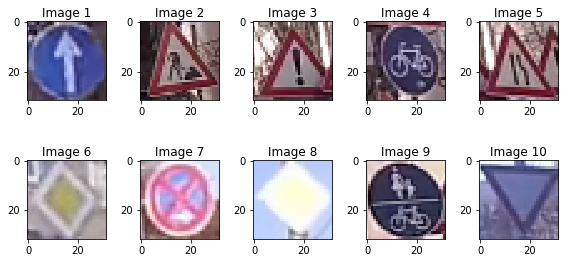

Image 1 expected label Ahead only
Image 2 expected label Road work
Image 3 expected label General caution
Image 5 expected label Road narrows on the right
Image 6 expected label Priority road
Image 8 expected label Priority road
Image 10 expected label Yield


In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#### Credits: I extracted the images from a dashcam video found on youtube.com, searching for 'dashcam germany'. 
#### Here is the link to the stream: https://www.youtube.com/watch?v=QuZH0f_KSD4
from scipy import misc
import glob

images = []
image_labels = np.array([35, 25, 18, 0, 24, 12, 0, 12, 0, 13])
figure = plt.figure(figsize=(8,4))
for i in range(1,11):
    image = misc.imread('images/sign_' + str(i) + '.png')
    images.append(image)
    subplot = figure.add_subplot(2,5,i)
    plt.title("Image " + str(i))
    subplot.imshow(image)
plt.tight_layout()
plt.show()
images = np.array(images)
images = images[...,0:3]
for i in range(image_labels.shape[0]):
    if ( image_labels[i] != 0):
        print ("Image {} expected label {}".format(i+1, sign_list[image_labels[i]]))



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Image 5 above partially contains another traffic sign. Other than that one would expect all other traffic signs to be correctly identified if they were part of the training list. Unfortunately Images 4, 7 and 9 are not in the training dataset. I set their expected labels to 0, their results should not match to 20km/h and ideally they should be filtered out. Let's see what prediction we get for those below.

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def predict_ensemble(images):
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    predicted_labels = []
    for i in range(num_dnn):
        for label in labels:
            saver.restore(sess, "saved_networks/" + label + "_" + str(i))
            data_x = create_test_data(images, label_to_preprocessing(label))
            pred_labels = predict_labels(data_x)
            predicted_labels.append(pred_labels)
    predicted_labels = np.array(predicted_labels)
    ensemble_prediction_vector = np.mean(predicted_labels, axis=0)
    ensemble_prediction_class = np.argmax(ensemble_prediction_vector, axis=1)
    return (ensemble_prediction_class, ensemble_prediction_vector)
predicted, predicted_softmax = predict_ensemble(images)
predicted_correct = (predicted == image_labels )
print("Test Accuracy: {:.2f}%".format(predicted_correct.mean()*100))


Test Accuracy: 70.00%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model was able to correctly predict all images that were part of the training set: 7 out of 10.
Three of the images were not part of the training and therefore could not correctly labeled.

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

top3 = sess.run(tf.nn.top_k(tf.constant(softmax(predicted_softmax)), k=3))
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
for i in range(10):
    print("Image {} top 3. \n\tIndex: {} Probability: {:.1f}%; \n\tIndex: {} Probability: {:.1f}%; \n\tIndex: {} Probability: {:.1f}%;".format(
        i+1, 
        top3.indices[i][0], top3.values[i][0]*100,
        top3.indices[i][1], top3.values[i][1]*100,
        top3.indices[i][2], top3.values[i][2]*100,
        ))


Image 1 top 3. 
	Index: 35 Probability: 22.6%; 
	Index: 27 Probability: 10.0%; 
	Index: 19 Probability: 10.0%;
Image 2 top 3. 
	Index: 25 Probability: 23.0%; 
	Index: 27 Probability: 10.0%; 
	Index: 19 Probability: 10.0%;
Image 3 top 3. 
	Index: 18 Probability: 23.2%; 
	Index: 27 Probability: 10.0%; 
	Index: 19 Probability: 10.0%;
Image 4 top 3. 
	Index: 38 Probability: 17.0%; 
	Index: 36 Probability: 11.4%; 
	Index: 14 Probability: 10.4%;
Image 5 top 3. 
	Index: 24 Probability: 21.9%; 
	Index: 29 Probability: 10.3%; 
	Index: 26 Probability: 10.2%;
Image 6 top 3. 
	Index: 12 Probability: 20.3%; 
	Index: 27 Probability: 10.0%; 
	Index: 19 Probability: 10.0%;
Image 7 top 3. 
	Index: 1 Probability: 11.7%; 
	Index: 5 Probability: 11.6%; 
	Index: 2 Probability: 11.4%;
Image 8 top 3. 
	Index: 12 Probability: 20.0%; 
	Index: 15 Probability: 10.1%; 
	Index: 27 Probability: 10.0%;
Image 9 top 3. 
	Index: 3 Probability: 11.0%; 
	Index: 35 Probability: 10.9%; 
	Index: 36 Probability: 10.8%;
Image

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model is certain for images 1, 2, 3, 5, 6, 8 and 10, as the probability of the top prediction is around double the probability of the second prediction. Images 4, 7 and 9 the probabilities of the top prediction are closer to the second and third prediction, indicating that the network could not distinguish the sign. This is exactly as expected since those signs were not part of the training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.